# Almemo - Data Analysis

- Data Wrangling:
 - read data: combine to one file
 - handle missing/wrong data; gaps in time series?!

- Data analysis:
 - extract specific data (days, time, specific values/ranges)
 - resampling (hours, cumulative sum,...)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import datetime 
import glob



# I. Alles in eine Datei speichern


DatetimeIndex immer besser -> Timestamp verwenden! 

https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

In [140]:
%pwd

'H:\\Python_Code\\Plot_'

In [141]:
pattern = 'H:/Python_Code/Plot_/data_almemo/*.txt'
txt_files = glob.glob(pattern)

frames = []

# use parse_dates=True for Datetime Index working in pandas
# use index_col='Timestamp' for timestamp instead of indices
for txt in txt_files:  
    df = pd.read_csv(txt,delimiter=';', skiprows=[0], names=['Timestamp', 'Epoch', 'OutsideVert', 
                                                             'OutsideHor', 'InsideCeiling', 'InsideTable', 
                                                             'InsideWork', 'InsideEye', 'new','InsideTable2', 
                                                             'InsideWork2'],index_col='Timestamp', 
                     parse_dates=True, dayfirst = True)
    
    frames.append(df)
    
df = pd.concat(frames)
df.to_csv("H:/Python_Code/Plot_/Almemo_data.csv", sep=';', encoding='utf-8')

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-04-28 00:00:46,1556402446397,10,0,1,9,1,1,3,NaN,NaN
2019-04-28 00:01:56,1556402516397,10,0,1,9,2,1,3,NaN,NaN


,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-10 09:48:29,1562744909640,17320,72430,42.45,124.2,55.8,87,56,124.17,55.78
2019-07-10 09:49:39,1562744979641,17720,73270,42.79,125.2,56.4,83,55,125.16,56.36


Epoch             int64
OutsideVert      object
OutsideHor       object
InsideCeiling    object
InsideTable      object
InsideWork       object
InsideEye        object
new              object
InsideTable2     object
InsideWork2      object
dtype: object

(97876, 10)

In [149]:
display(type(df))
display(df.dtypes)
display(df.shape)

pandas.core.frame.DataFrame

Epoch             int64
OutsideVert      object
OutsideHor       object
InsideCeiling    object
InsideTable      object
InsideWork       object
InsideEye        object
new              object
InsideTable2     object
InsideWork2      object
dtype: object

(97876, 10)

# II. Teildaten auswählen

- Tagesdatei
- Nur beide Außenwerte
- Tagesdatei mit out/in Verhältnis

In [143]:
df_20190709 = df.loc["2019-07-09"]
df_20190709.head()

,Epoch,OutsideVert,OutsideHor,InsideCeiling,InsideTable,InsideWork,InsideEye,new,InsideTable2,InsideWork2
Timestamp,,,,,,,,,,
2019-07-09 00:00:31,1562623231363,10,0,0.03,0,0,32,3,0,0
2019-07-09 00:01:31,1562623291364,10,0,0.03,0,0,24,3,0,0
2019-07-09 00:02:31,1562623351366,10,0,0.03,0,0,24,2,0,0
2019-07-09 00:03:31,1562623411367,10,0,0.03,0,0,26,3,0,0
2019-07-09 00:04:31,1562623471368,10,0,0.03,0,0,33,3,0,0


In [144]:
df_20190709_out = df_20190709[['OutsideVert','OutsideHor']]
df_20190709_out.head()

,OutsideVert,OutsideHor
Timestamp,,
2019-07-09 00:00:31,10,0
2019-07-09 00:01:31,10,0
2019-07-09 00:02:31,10,0
2019-07-09 00:03:31,10,0
2019-07-09 00:04:31,10,0


# III. Single Day

- extract time span
- resample to hour

Text(0, 0.5, 'Beleuchtungsstärke [lux]')

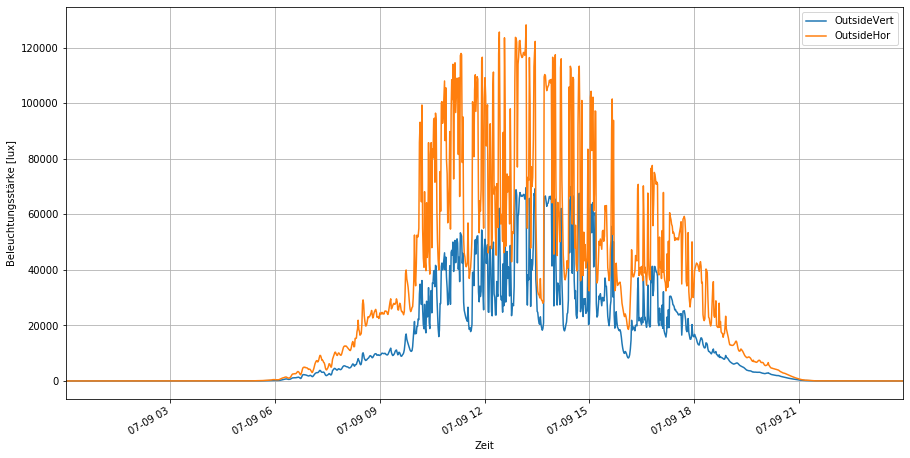

In [151]:
ax = df_20190709_out.plot(grid=True,figsize=(15,8))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

Text(0, 0.5, 'Beleuchtungsstärke [lux]')

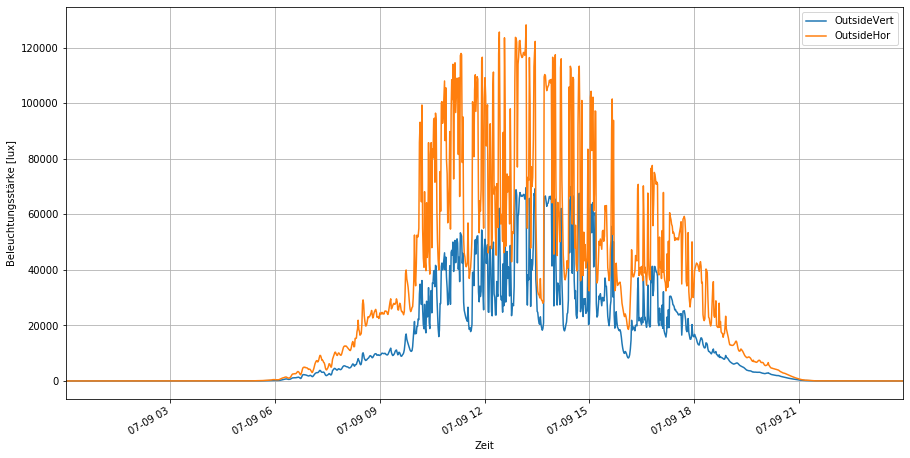

In [152]:
ax = df_20190709.plot(y=['OutsideVert','OutsideHor'],grid=True,figsize=(15,8))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

Text(0, 0.5, 'Beleuchtungsstärke [lux]')

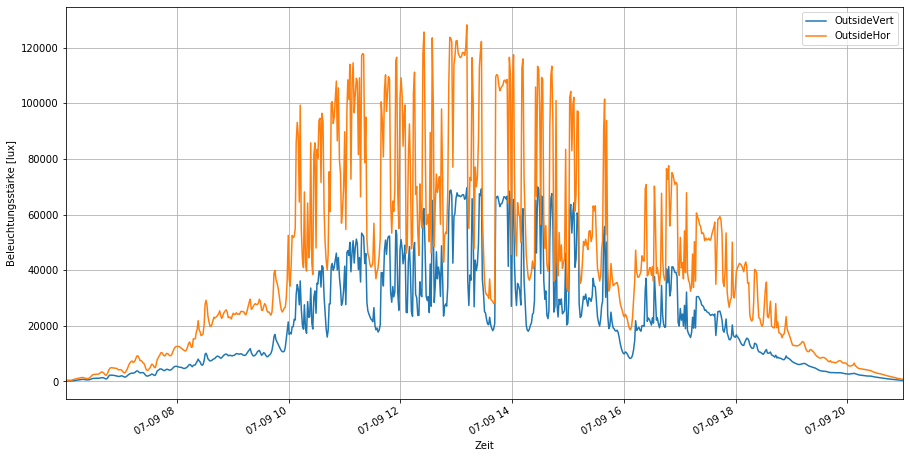

In [146]:
# specific period 

# display(df_20190709_out.index)
# display(type(df_20190709_out.index))
df_20190709_out2 = df_20190709_out.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00']
ax = df_20190709_out2.plot(y=['OutsideVert','OutsideHor'],grid=True,figsize=(15,8))
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

In [147]:
# df.Time.dt.hour.head() 
df_20190709.index.hour


Int64Index([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
            ...
            23, 23, 23, 23, 23, 23, 23, 23, 23, 23],
           dtype='int64', name='Timestamp', length=1342)

In [148]:
# resample
df_res_min = df_20190709_out.resample('1min').mean()
display(df_res_min.head().head())
df2 = df_res_min.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00']

# for 'mean' convert str to float
# df_20190709_out['OutsideVert'] = df_20190709_out.OutsideVert.astype(float)
# df_20190709_out['OutsideHor'] = df_20190709_out.OutsideHor.astype(float)

df2.plot(figsize = (15,10), grid = True)
display(df_20190709_out.head())

DataError: No numeric types to aggregate

In [ ]:
df_20190709_out2 = df_20190709_out.loc['2019-07-09 06:00:00':'2019-07-09 21:00:00']

ax = df_20190709_out2.plot(y = ['OutsideVert','OutsideHor'],grid=True,figsize=(15,10), title = 'Beleuchtungsstärkeverlauf')
ax.set_xlabel("Zeit")
ax.set_ylabel("Beleuchtungsstärke [lux]")

# Formatting Date values at x-axis
# https://matplotlib.org/api/dates_api.html
myFmt = myFmt = DateFormatter("%H:%M") # "%m/%d"
ax.xaxis.set_major_formatter(myFmt)

### As panda.core.series.Series - Format

In [ ]:
df_ceil = df.InsideCeiling
display(df_ceil.head())

display(type(df_ceil))

In [ ]:
df_ceil2 = df_ceil.loc['2019-07-08']
df_ceil2.plot()

# IV. Ratio in/out

- klarer Himmel mit Sonne
- bedeckter Himmel = TQ

In [ ]:
# Add column with ratio

# create copy to avoid error because overwriting slice of df!
df_today = df_today.copy()

# calculate ratio
df_today['ratio'] = df_today['InsideCeiling']/df_today['OutsideVert']*100

ax = df_today.plot(y='ratio',grid=True,figsize=(10,7))
ax.set_xlabel("Zeit")
ax.set_ylabel("Verhältnis [%]")


# V. Whole DF - Resampling

In [ ]:
# convert whole DataArray to float
display(df.shape)
display(type(df))
display(df.dtypes)
display(type(df3))
display(df3.dtypes)

df3 = df.apply(pd.to_numeric, errors='coerce')
# errors : {‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
#If ‘raise’, then invalid parsing will raise an exception
#If ‘coerce’, then invalid parsing will be set as NaN
#If ‘ignore’, then invalid parsing will return the input

df3.plot(y = ['OutsideVert','OutsideHor','InsideCeiling'],figsize = (15,10))
